In [1]:
from chatbot import Chatbot
import numpy as np
from functions import *
from sklearn import decomposition
import matplotlib.pyplot as plt
from matplotlib import offsetbox

bot = Chatbot(mode=3)
file = open("easy_train.txt", "r")
output = []

for sentence in file.readlines():
    output.append(bot.predict_latent_mapping(sentence)[0])

Using TensorFlow backend.


Loading [200D GloVe] Module...
Loaded [200D GloVe] Module.
Loading [300D GloVe] Module...
Loaded [300D GloVe] Module.
Loading [300D GloVe Words] Module...
Loaded [300D GloVe Words] Module.
Loading [300D GloVe Values] Module...
Loaded [300D GloVe Values] Module.
Loading [300D GloVe KDTree] Module...
Loaded [300D GloVe KDTree] Module.
Loading [Emotion Classifier] Module...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 75)                82800     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 608       
Total params: 83,408
Trainable params: 83,408
Non-trainable params: 0
_________________________________________________________________
Loaded model from disk.
Loaded [Emotion Classifier] Module.
Loading [Query Type Classifier] Module...
__________________________________________________________

Loaded [Training output] Module.


[[1.0000000e+00 6.4554811e-01]
 [9.2797804e-01 2.9472202e-01]
 [6.9688684e-01 5.4506660e-01]
 [0.0000000e+00 4.8857704e-01]
 [1.3907427e-01 7.9187089e-01]
 [5.7248163e-01 2.7889761e-01]
 [3.9802632e-01 9.0769585e-04]
 [4.3597201e-01 6.6873860e-01]
 [4.2093548e-01 1.0000000e+00]
 [7.3683709e-01 8.8251746e-01]
 [7.4546260e-01 0.0000000e+00]
 [1.0301334e-01 1.4732586e-01]
 [3.0940819e-01 4.0139279e-01]]


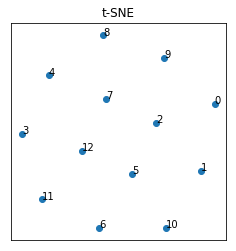

In [6]:
from sklearn import manifold, discriminant_analysis

def embedding_plot(X, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    print(X)
    plt.figure()
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1])
    for i in range(len(X)):
        ax.annotate(str(i), X[i])

    #shown_images = np.array([[1., 1.]])
    #for i in range(X.shape[0]):
    #    if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
    #    shown_images = np.r_[shown_images, [X[i]]]
        #ax.add_artist(offsetbox.AnchoredText(str(i), X[i]))

    plt.xticks([]), plt.yticks([])
    plt.title(title)

X_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(output)
embedding_plot(X_tsne,"t-SNE")

plt.show()